In [6]:
from surface_dynamics.all import Origami # Setting up the imports
import numpy as np

In [7]:
def singularXYCoord(origami, cylindertop, singularity):
    '''
    Input:
    The origami, top row of the simple cylinder, the singularities(squares with singularity on the top right corner)
    Output:
    The xy coordinates of the singularities as they appear above the cylinder, as a list of pairs/2d array
    '''
    downVec = origami.u_inv_tuple()
    rightVec = origami.r_tuple()
    topRow = [x - 1 for x in cylindertop] # needs to be 0-indexed
    singular = [x - 1 for x in singularity] # needs to be 0-indexed
    topRightHiPair = {}
    topLeftHiPair = {}
    for s in singular:
        traveller = downVec[s]
        height = 1
        miss = True
        while traveller != s: # travel downward until hit top row of cylinder or one full cycle
            if traveller in topRow:
                topRightHiPair[traveller] = height
                miss = False
                break
            traveller = downVec[traveller]
            height = height + 1
        if miss: # it travelled one full cycle, might want to try the other side of the singularity
            traveller = downVec[rightVec[s]]
            height = 1
            while traveller != rightVec[s]:
                if traveller in topRow:
                    topLeftHiPair[traveller] = height
                    break
                traveller = downVec[traveller]
                height = height + 1
    xycoords = []
    for index, ind in enumerate(topRow):
        if topLeftHiPair.get(ind) != None: # this point in the cylinder has an intersection
            xycoords.append([index, topLeftHiPair[ind]])
        if topRightHiPair.get(ind) != None:
            xycoords.append([index + 1, topRightHiPair[ind]])
    print(xycoords)
    return xycoords

In [8]:
def newsingularXYCoord(origami, cylindertop, singularity, listinfo):
    '''
    Input:
    The origami, top row of the simple cylinder, the singularities(squares with singularity on the top right corner)
    listinfo of {ip, pres_move, len(path)}, where the intersection is pres_move to the right of square ip
    Output:
    The xy coordinates of the singularities as they appear above the cylinder, as a list of pairs/2d array
    '''
    downVec = origami.u_inv_tuple()
    rightVec = origami.r_tuple()
    topRow = [x - 1 for x in cylindertop] # needs to be 0-indexed
    singular = [x - 1 for x in singularity] # needs to be 0-indexed
    topRightHiPair = {}
    for tup in listinfo:
        topRightHiPair[tup[1][1]] = [tup[1][2], tup[1][3]]
    while topRow[0] not in singular:
        topRow = np.roll(topRow, 1)
    xycoords = [[0,0]]
    for index, ind in enumerate(topRow):
        if topRightHiPair.get(ind) != None:# this point in the cylinder has an intersection
            xycoords.append([index + topRightHiPair[ind][0], topRightHiPair[ind][1]])
    xycoords.append([len(topRow),0])
    # print(xycoords)
    return xycoords

In [9]:
def checkConvexity(xycoords):
    '''
    Requires: xycoordinates of the singularity above the cylinder
    Effects: checks if it is convex via the fifth test
    '''
    slope = np.inf
    for index, pair in enumerate(xycoords):
        if index > 0:
            newslope = (pair[1] - xycoords[index - 1][1])/float(pair[0] - xycoords[index - 1][0])
            if newslope >= slope:
                return false
            slope = newslope
    return true

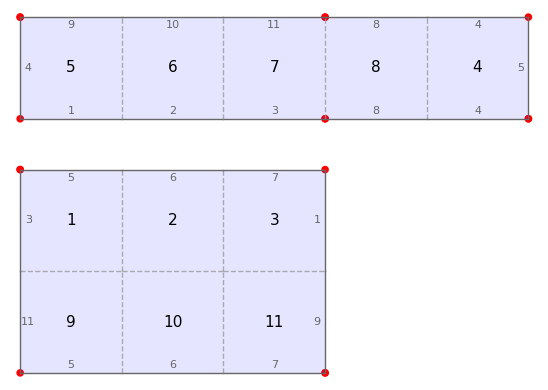

[[0, 1], [3, 1]]


True

In [10]:
ori = Origami('(1,2,3)(4,5,6,7,8)(9,10,11)','(1,5,9)(2,6,10)(3,7,11)')
ori.show()
xy = singularXYCoord(ori, [1, 2, 3], [3,4,7])
checkConvexity(xy)